In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression, SGDRegressor  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.datasets import fetch_california_housing  
import torch as tp
import torchvision as tc
import PIL as pl
print("All packages installed successfully!")

All packages installed successfully!


In [2]:
import torch
import torch.nn as nn  # Neural network module
import torch.optim as optim  # Optimization algorithms
from torchvision import datasets, transforms  # Datasets and transformations
from torch.utils.data import DataLoader  # Data loading utilities
import matplotlib.pyplot as plt  # Plotting library
import numpy as np  # Numerical computations
from PIL import Image  # Image processing
import tkinter as tk  # GUI for file upload
from tkinter import filedialog  # File dialog for selecting images
from sklearn.metrics import confusion_matrix  # Confusion matrix for evaluation
import seaborn as sns  # Visualization library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Metrics for evaluation

In [3]:
# Define a transformation pipeline for the dataset
# transforms.Compose allows chaining multiple transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor with mean 0.5 and std 0.5
])

# Load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Load the MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [4]:
# Create data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Shuffle training data
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # No need to shuffle test data

In [5]:
# Define a Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 16)  # First fully connected layer (input: 28x28, output: 16)
        self.fc2 = nn.Linear(16, 16)  # Second fully connected layer (input: 16, output: 16)
        self.fc3 = nn.Linear(16, 10)  # Third fully connected layer (input: 16, output: 10)
        self.relu = nn.ReLU()  # ReLU activation function
        self.softmax = nn.LogSoftmax(dim=1)  # LogSoftmax for classification

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image into a 1D vector
        x = self.relu(self.fc1(x))  # Apply ReLU to the first layer
        x = self.relu(self.fc2(x))  # Apply ReLU to the second layer
        x = self.softmax(self.fc3(x))  # Apply LogSoftmax to the output layer
        return x

# Instantiate the model
model = MLP()

In [6]:
#Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Cross entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001) #Adam optimizer with learning rate 0.001

In [7]:
# Lists to store training and testing losses
train_losses, test_losses = [], []

# Training loop
epochs = 10  # Number of training epochs
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0  # Initialize running loss for the epoch
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients from the previous iteration
        output = model(images)  # Forward pass: compute predictions
        loss = criterion(output, labels)  # Compute the loss
        loss.backward()  # Backward pass: compute gradients
        optimizer.step()  # Update model parameters
        running_loss += loss.item()  # Accumulate the loss
    train_loss = running_loss / len(train_loader)  # Average loss for the epoch
    train_losses.append(train_loss)  # Store training loss

    # Evaluation on the test set
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0  # Initialize test loss
    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in test_loader:
            output = model(images)  # Forward pass: compute predictions
            loss = criterion(output, labels)  # Compute the loss
            test_loss += loss.item()  # Accumulate the loss
    test_loss = test_loss / len(test_loader)  # Average test loss
    test_losses.append(test_loss)  # Store test loss

    # Print epoch results
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.5650, Test Loss: 0.3248
Epoch 2/10, Train Loss: 0.3242, Test Loss: 0.2851
Epoch 3/10, Train Loss: 0.2856, Test Loss: 0.2597
Epoch 4/10, Train Loss: 0.2614, Test Loss: 0.2531
Epoch 5/10, Train Loss: 0.2432, Test Loss: 0.2453
Epoch 6/10, Train Loss: 0.2315, Test Loss: 0.2286
Epoch 7/10, Train Loss: 0.2206, Test Loss: 0.2130
Epoch 8/10, Train Loss: 0.2130, Test Loss: 0.2053
Epoch 9/10, Train Loss: 0.2055, Test Loss: 0.2144
Epoch 10/10, Train Loss: 0.2008, Test Loss: 0.2123


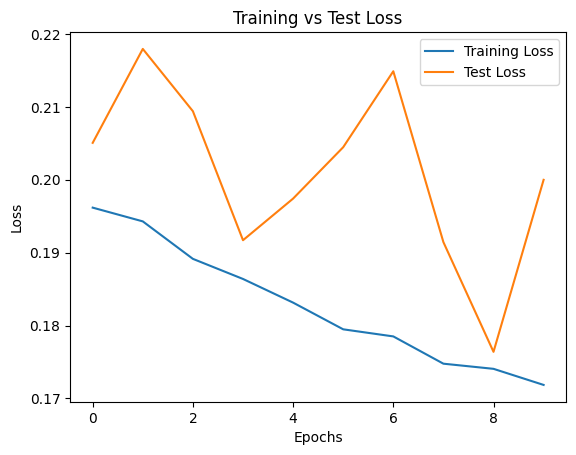

In [9]:
# Plot training and test losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()

In [10]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
y_true, y_pred = [], []  # Lists to store true and predicted labels
with torch.no_grad():  # Disable gradient computation
    for images, labels in test_loader:
        output = model(images)  # Forward pass: compute predictions
        _, predicted = torch.max(output, 1)  # Get the predicted class
        y_true.extend(labels.numpy())  # Store true labels
        y_pred.extend(predicted.numpy())  # Store predicted labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)  # Accuracy
precision = precision_score(y_true, y_pred, average='macro')  # Precision
recall = recall_score(y_true, y_pred, average='macro')  # Recall
f1 = f1_score(y_true, y_pred, average='macro')  # F1-Score

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

Accuracy: 0.9416
Precision: 0.9423
Recall: 0.9400
F1-Score: 0.9404

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.99      0.97      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.88      0.95      0.91      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.84      0.89       892
           6       0.97      0.92      0.94       958
           7       0.94      0.96      0.95      1028
           8       0.93      0.93      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [1]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Function to predict an image using the trained model
def predict_image(image):
    image = image.view(-1, 28*28)  # Flatten the input image
    with torch.no_grad():  # Disable gradient computation
        output = model(image)  # Forward pass: compute predictions
        _, predicted = torch.max(output, 1)  # Get the predicted class
    return predicted.item()  # Return the predicted label

# Select a random image from the test set
sample_idx = np.random.randint(len(test_dataset))
sample_image, sample_label = test_dataset[sample_idx]

# Display the selected image
plt.imshow(sample_image.squeeze(), cmap="gray")
plt.title(f"Actual Label: {sample_label}")
plt.show()

# Run inference on the selected image
predicted_label = predict_image(sample_image)
print(f"Predicted Label: {predicted_label}")

# Function to predict an uploaded image
def predict_image(image):
    image = image.convert('L').resize((28, 28))  # Convert to grayscale and resize to 28x28
    image = transforms.ToTensor()(image).view(-1, 28*28)  # Convert to tensor and flatten
    with torch.no_grad():  # Disable gradient computation
        output = model(image)  # Forward pass: compute predictions
        _, predicted = torch.max(output, 1)  # Get the predicted class
    return predicted.item()  # Return the predicted label

# Function to upload an image and run inference
def upload_and_predict():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename()  # Open file dialog to select an image
    if file_path:
        image = Image.open(file_path)  # Open the selected image
        plt.imshow(image, cmap="gray")  # Display the image
        plt.title("Uploaded Image")
        plt.show()
        predicted_label = predict_image(image)  # Predict the label
        print(f"Predicted Label: {predicted_label}")

# Call the upload function
upload_and_predict()

NameError: name 'confusion_matrix' is not defined